In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.optimizers import Adam

2.9.2


In [ ]:
# Library untuk mengimport tensorflow
import tensorflow as tf
print('Versi Tensor Flow yang digunakan adalah versi : ',tf.__version__)
from tensorflow.keras.optimizers import Adam

# mount drive dan import file
import zipfile, os

from google.colab import drive
drive.mount('/content/drive')
# melakukan ekstraksi pada file zip
local_zip = '/content/drive/MyDrive/Data Batiknyo.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Membaca Direktori Awal
base_dir = '/content/Data Batiknyo'
print ("\n Disini terdapat Folder : ")
!ls "/content/Data Batiknyo"



Versi Tensor Flow yang digunakan adalah versi :  2.9.2


In [ ]:
train_dir = os.path.join(base_dir, 'train')
print ('Jumlah Folder pada direktory train : ' , len(os.listdir(train_dir)))

# membaca direktori pada folder train (class train)
os.listdir(train_dir)

Jumlah Folder pada direktory train :  3


['Batik Megamendung', 'Batik Parang', 'Batik Poleng']

In [ ]:
validation_dir = os.path.join(base_dir, 'val')

print ('Jumlah Folder pada direktory val : ' , len (os.listdir(validation_dir)))

# membaca direktori pada folder val (class val)
os.listdir(validation_dir)

Jumlah Folder pada direktory val :  3


['Batik Megamendung', 'Batik Parang', 'Batik Poleng']

In [ ]:
# membuat direktori Batik pada direktori data TRAINING

train_megamendung_dir = os.path.join(train_dir, 'Batik Megamendung')
train_poleng_dir = os.path.join(train_dir, 'Batik Poleng')
train_parang_dir = os.path.join(train_dir, 'Batik Parang')

print('Jumlah gambar batik megamendung : ' , len(os.listdir(train_megamendung_dir)))
print('Jumlah gambar batik poleng : ' , len(os.listdir(train_poleng_dir)))
print('Jumlah gambar batik parang : ' , len(os.listdir(train_parang_dir)))
print ('total = ' , len(os.listdir(train_megamendung_dir))+len(os.listdir(train_poleng_dir))+len(os.listdir(train_parang_dir)))




# membuat direktori Batik pada direktori data Testing

validation_megamendung_dir = os.path.join(validation_dir, 'Batik Megamendung')

validation_poleng_dir = os.path.join(validation_dir, 'Batik Poleng')
validation_parang_dir = os.path.join(validation_dir, 'Batik Parang')

print('Jumlah gambar batik megamendung : ' , len(os.listdir(validation_megamendung_dir)))
print('Jumlah gambar batik poleng : ' , len(os.listdir(validation_poleng_dir)))
print('Jumlah gambar batik parang : ' , len(os.listdir(validation_parang_dir)))
print ('total = ' , len(os.listdir(validation_megamendung_dir))+len(os.listdir(validation_poleng_dir))+len(os.listdir(validation_parang_dir)))



Jumlah gambar batik megamendung :  72
Jumlah gambar batik poleng :  72
Jumlah gambar batik parang :  72
total =  216
Jumlah gambar batik megamendung :  8
Jumlah gambar batik poleng :  8
Jumlah gambar batik parang :  8
total =  24


In [ ]:
# import random
# from shutil import copyfile

# def train_val_split(source , train, val , train_ratio):
#   total_size = len(os.listdir(source))
#   train_size = int(train_ratio * total_size)
#   val_size = total_size - train_size

#   randomized = random.sample(os.listdir(source) , total_size)
#   train_files = randomized[0:train_size]
#   val_files = randomized[train_size:total_size]

#   for i in train_files :
#     i_file = source + i
#     destination = train + 1
#     copyfile(i_file , destination)

#     for i in val_files :
#       i_file = source + i
#       destination = train + 1
#       copyfile(i_file , destination)

#     #jumlah pembagian data training dan testing
#     train_ratio = 0.9

#     #pembagian training dan validasi
#     source_00 = train_megamendung_dir
#     train_00 = train_megamendung
#     val_00 = validation_megamendung_dir
#     train_val_split(source_00 , train_00, val_00 , train_ratio)

#     source_00 = train_megamendung_dir
#     train_00 = train_megamendung
#     val_00 = validation_megamendung_dir
#     train_val_split(source_01 , train_01, val_01 , train_ratio)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip = True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2 ,
                    height_shift_range = 0.2,
                    zoom_range = 0.1)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip = True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                     width_shift_range = 0.2 ,
                    height_shift_range = 0.2,
                    zoom_range = 0.1)

In [ ]:
batch = 24
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(224, 224),  # mengubah resolusi seluruh gambar
        batch_size=batch,
        color_mode="rgb",
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(224, 224), # mengubah resolusi seluruh gambar
        batch_size=batch,
        color_mode="rgb",
        class_mode='categorical',
        shuffle=True)

Found 216 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed = 112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed = 112),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# lr = 0.00005
# tf.keras.optimizers.Adam(learning_rate=lr)
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
epoch = 200
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=epoch, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=validation_generator.samples//validation_generator.batch_size,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/200
9/9 [==============================] - 4s 379ms/step - loss: 1.9266 - accuracy: 0.3565 - val_loss: 1.0935 - val_accuracy: 0.3333
Epoch 2/200
9/9 [==============================] - 3s 327ms/step - loss: 1.0829 - accuracy: 0.3241 - val_loss: 1.0963 - val_accuracy: 0.2917
Epoch 3/200
9/9 [==============================] - 3s 327ms/step - loss: 1.0026 - accuracy: 0.4028 - val_loss: 1.2248 - val_accuracy: 0.5000
Epoch 4/200
9/9 [==============================] - 3s 324ms/step - loss: 0.9267 - accuracy: 0.5880 - val_loss: 1.3378 - val_accuracy: 0.5833
Epoch 5/200
9/9 [==============================] - 3s 327ms/step - loss: 0.9388 - accuracy: 0.5556 - val_loss: 1.1960 - val_accuracy: 0.4167
Epoch 6/200
9/9 [==============================] - 3s 330ms/step - loss: 0.9466 - accuracy: 0.5509 - val_loss: 1.4545 - val_accuracy: 0.4583
Epoch 7/200
9/9 [==============================] - 3s 336ms/step - loss: 0.9965 - accuracy: 0.5370 - val_loss: 1.1086 - val_accuracy: 0.4167
Epoch 8/200
9

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

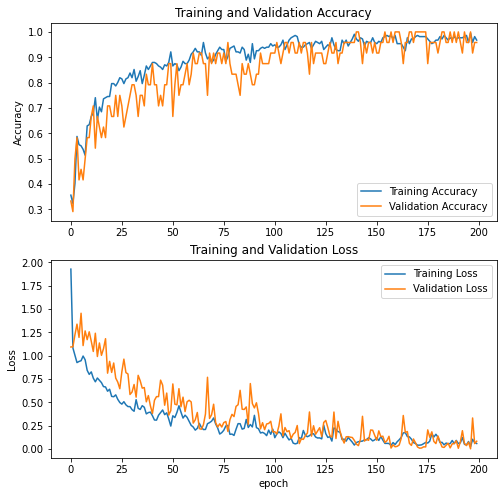

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Saving 2002 (6).jpg to 2002 (6) (1).jpg
2002 (6).jpg
Kelas :   Batik Parang


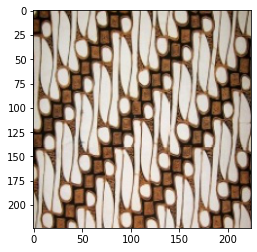

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images 
  path = fn
  img = image.load_img(path, target_size = (224,224))
  imgplot = plt.imshow (img)
  x= image.img_to_array(img)
  x = np.expand_dims (x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size =10)
  print (fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes [0][j]== 1. :
      print ('Kelas :  ', class_list[j+1])
      break

      